## Computation Complexity and Limitation

1. Automata Cell 

$$ x_i = x_{i - 1} + 1 $$

$$ x_i = (x_{i - 1} + 1) % 2 $$


## Three Types of 1-dimension CA

1. Finite Sequence. A finite number of cells arranged in a row. All cells except th first and last have two neighbors; 
2. Ring: A finite number of cells arranged in a ring. All cells have two neighbors; 
3. Infinite Sequence: An infinite number of cells arranged in a row.

## If we define rules: 

1. any cell has two states: 0 and 1
2. if one cell is 0, only when its neighbors are both 0, otherwise, it will be 1 next time. (Alive)
3. if one cell is 1, the next state to 0 (Death)

In [1]:
from typing import Iterable

In [17]:
def ring_cells(initial: Iterable, rule: dict) -> Iterable:
    for index, now in enumerate(initial):
        state = ''.join(map(str, [initial[index - 1], now, initial[(index+1)%len(initial)]]))
        next_state = rule[state]
        yield next_state

| prev | 111 | 110 | 101 | 100 | 011 | 010 | 001 | 000 | 
| - | - | - | - | - | - | - | - | - | 
| next | 0 | 0 | 1 | 1 | 0 | 0 | 1 | 0 | 

Binary-Rule: 50

In [183]:
rule_50 = {
    '111': 0,
    '110': 0,
    '101': 1,
    '100': 1,
    '011': 0,
    '010': 0, 
    '001': 1,
    '000': 0
}

In [186]:
list(ring_cells([0, 0, 0, 1, 0, 0, 0, 0], rule_50))

[0, 0, 1, 0, 1, 0, 0, 0]

In [187]:
def automata_cell_for_n_step(initial, step=1, *, cell_function, rule, monitor=False):
    current = initial
    history = [current]
    while step >= 0:
        if monitor:
            print(f'Current: {current}')
        output = list(cell_function(current, rule))
        history.append(output)
        current = output
        step -= 1
        
    return history

In [188]:
_10_step_output = automata_cell_for_n_step([0, 0, 0, 1, 0, 0, 0, 0], step=10, 
                                         cell_function=ring_cells, rule=rule_50)

In [189]:
%matplotlib inline

In [190]:
import matplotlib.pyplot as plt

In [191]:
import matplotlib

In [192]:
cmap = matplotlib.cm.Accent  # Can be any colormap that you want after the cm
cmap.set_bad(color='white')

/var/folders/d8/0s3c3vcs47qccb955ykczzkm0000gn/T/ipykernel_98559/2363434432.py:2: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Accent").copy()
  cmap.set_bad(color='white')


In [233]:
def pretty_print(binary_rows: Iterable) -> Iterable[str]:
    global cmap
    plt.figure(figsize = (10, 10))
    plt.imshow(binary_rows, cmap=cmap)

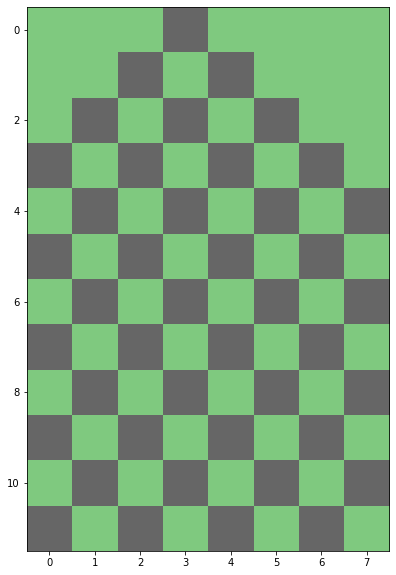

In [235]:
pretty_print(_4_step_output)

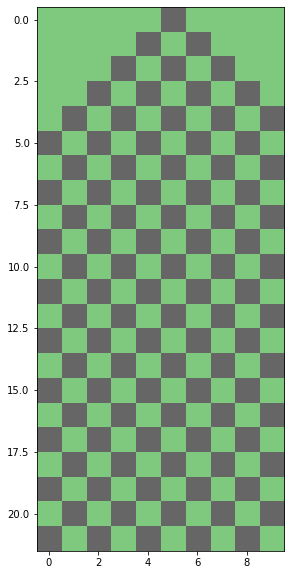

In [237]:
pretty_print(automata_cell_for_n_step([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], 
                                                      step=20, 
                                                      cell_function=ring_cells, 
                                                      rule=rule_50))

In [236]:
bin(18)

'0b10010'

#### Rule: 18
| prev | 111 | 110 | 101 | 100 | 011 | 010 | 001 | 000 | 
| - | - | - | - | - | - | - | - | - | 
| next | 0 | 0 | 0| 1 | 0 | 0 | 1 | 0 | 

In [199]:
rule_18 = {
    '111': 0,
    '110': 0,
    '101': 0,
    '100': 1,
    '011': 0,
    '010': 0, 
    '001': 1,
    '000': 0
}

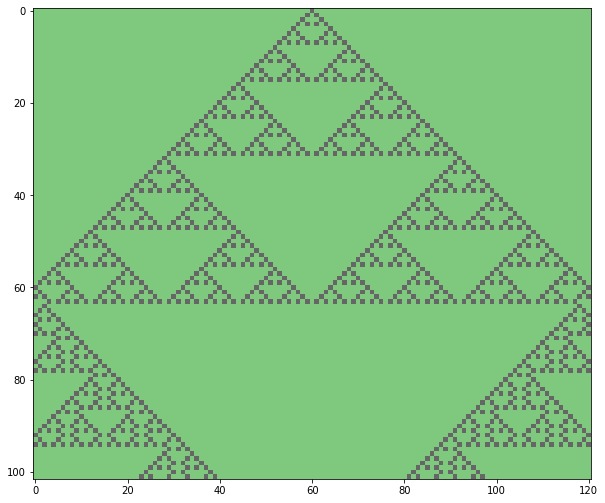

In [238]:
pretty_print(automata_cell_for_n_step([0]*60 + [1] + [0] * 60, 
                                                      step=100, 
                                                      cell_function=ring_cells, 
                                                      rule=rule_18))

In [220]:
bin(30)

'0b11110'

#### Rule: 30
| prev | 111 | 110 | 101 | 100 | 011 | 010 | 001 | 000 | 
| - | - | - | - | - | - | - | - | - | 
| next | 0 | 0 | 0| 1 | 1 | 1 | 1 | 0 | 

In [221]:
def generate_1_dimension_rule_by_number(number):
    neighbor_num = 2
    rule_map = {}
    rule_length = 2 ** (neighbor_num + 1) # neighbor + self
    binary_code = bin(number)[2:].zfill(rule_length) # change any number to binary, remove the '0b' mark
    for i in range(rule_length): 
        rule_map[bin(i)[2:].zfill(3)] = int(binary_code[::-1][i])
        # map index-0 to index: -1
    return rule_map

In [176]:
generate_1_dimension_rule_by_number(18) == rule_18

True

In [ ]:
generate_1_dimension_rule_by_number(18) == rule_18

In [182]:
bin(50)

'0b110010'

In [223]:
rule_30 = generate_1_dimension_rule_by_number(30)

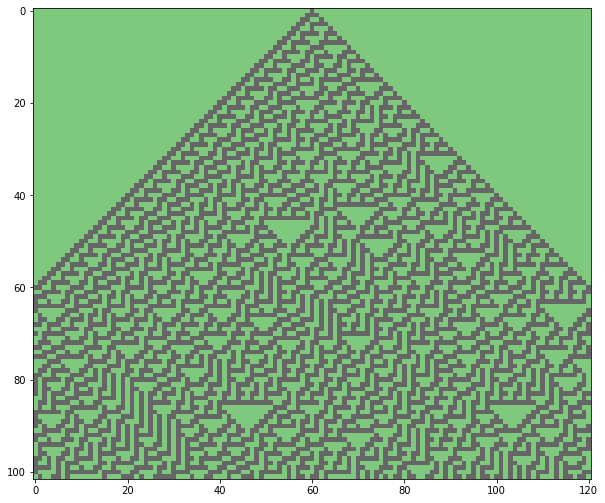

In [239]:
pretty_print(automata_cell_for_n_step([0]*60 + [1] + [0] * 60, 
                                                      step=100, 
                                                      cell_function=ring_cells, 
                                                      rule=rule_30))

## Turing Complete 
Rule: 110, whcih can compute any computable function.
> This property, also called universality. 

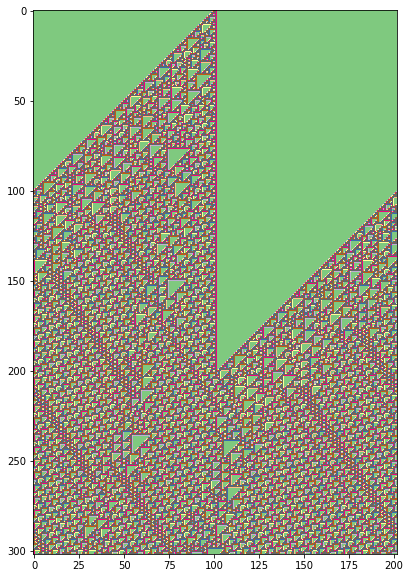

In [258]:
pretty_print(automata_cell_for_n_step([0]*100 + [1, 1] + [0] * 100, 
                                      step=300, 
                                      cell_function=ring_cells, 
                                      rule=generate_1_dimension_rule_by_number(110)))

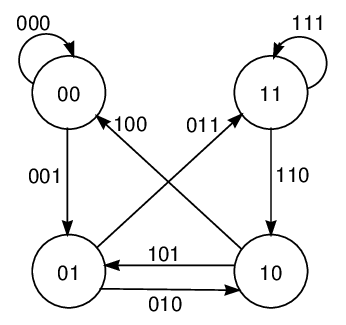

+ When Rule 110 is iteratively applied on certain input bit sequences, patterns emerge depending on sub-sequences found in the input bits. Given enough iterations, the following can happen:
+ The original sub-sequence appears in the same location as in the original input.
+ The original sub-sequence is preserved but 'moves' to a different location in the bitfield.
+ Two sub-sequences moving toward each other interact and 'pass through' each other.
+ Two sub-sequences combine to create a new sub-sequence.

The mirror image is rule 124, the complement is rule 137, and the mirrored complement is rule 193.

Starting with a single black cell, successive generations are given by interpreting the numbers 1, 6, 28, 104, 496, 1568, 7360, 27520, ... (OEIS A117999) in binary. Omitting trailing zeros (since the right n cells in step n of the triangle are always 0) gives the sequence 1, 3, 7, 13, 31, 49, 115, 215, 509, 775, 1805, ... (OEIS A006978), which are simply the previous numbers divided by 2^n, and the corresponding sequence is 1, 11, 111, 1101, 11111, ... (OEIS A070887).

Amazingly, the rule 110 cellular automaton is universal, as first conjectured by Wolfram (1986, pp. 485-557) and subsequently proven by Stephen Wolfram and his assistant Matthew Cook. This important discovery followed a program begun by Wolfram in 1985 to establish universality of rule 110. The main elements of the proof were put in place in 1994, with additional details and corrections continuing for several years (Wolfram 2002, p. 1115; Cook 2004).

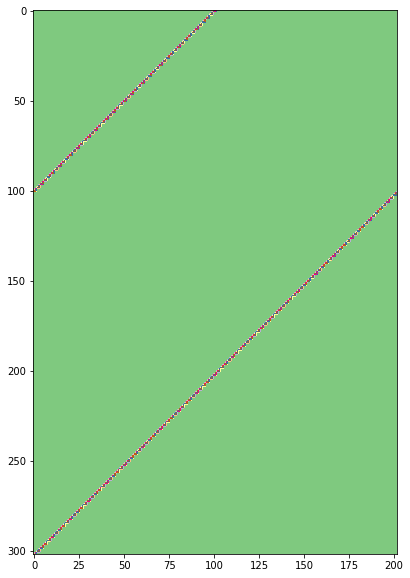

In [276]:
pretty_print(automata_cell_for_n_step([0]*100 + [1, 1] + [0] * 100, 
                                      step=300, 
                                      cell_function=ring_cells, 
                                      rule=generate_1_dimension_rule_by_number(134)))

## turning machine 

M = (Q, Σ, Γ, δ, b, q0, qf)

with

+ Q is a finite, non-empty set of states
+ Γ is a finite, non-empty set of the tape alphabet
+ Σ is the set of input symbols with Σ ⊂ Γ
+ δ is a partially defined function, the transition function:
+ δ : (Q \ {qf}) x Γ → Q x Γ x {L,N,R}
+ b ∈ &Gamma \ Σ is the blank symbol
+ q0 ∈ Q is the initial state
+ qf ∈ Q is the set of accepting or final states

Let's define a Turing machine, which complements a binary input on the tape, i.e. an input "1100111" e.g. will be turned into "0011000".
+ Σ = {0, 1}
+ Q = {init, final}
+ q0 = init
+ qf = final

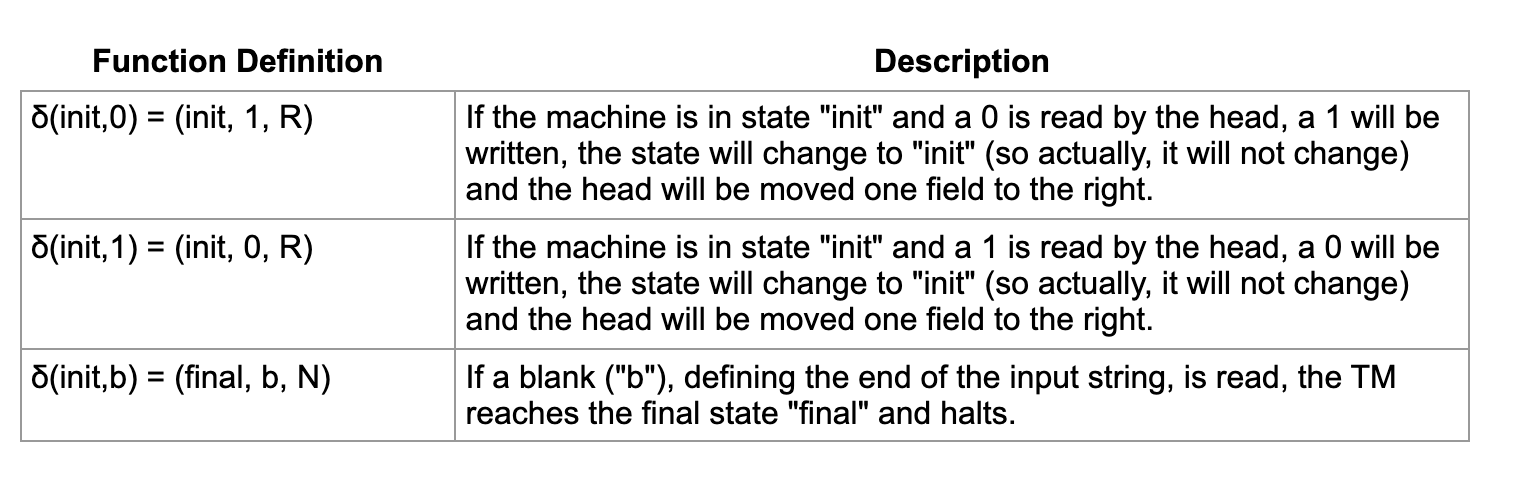

In [260]:
class Tape:
    
    blank_symbol = " "
    
    def __init__(self,
                 tape_string = ""):
        self.__tape = dict((enumerate(tape_string)))
        # last line is equivalent to the following three lines:
        #self.__tape = {}
        #for i in range(len(tape_string)):
        #    self.__tap[i] = input[i]
        
    def __str__(self):
        s = ""
        min_used_index = min(self.__tape.keys()) 
        max_used_index = max(self.__tape.keys())
        for i in range(min_used_index, max_used_index):
            s += self.__tape[i]
        return s    
    
    def __getitem__(self,index):
        if index in self.__tape:
            return self.__tape[index]
        else:
            return Tape.blank_symbol

    def __setitem__(self, pos, char):
        self.__tape[pos] = char 

        
class TuringMachine(object):
    
    def __init__(self, 
                 tape = "", 
                 blank_symbol = " ",
                 initial_state = "",
                 final_states = None,
                 transition_function = None):
        self.__tape = Tape(tape)
        self.__head_position = 0
        self.__blank_symbol = blank_symbol
        self.__current_state = initial_state
        if transition_function == None:
            self.__transition_function = {}
        else:
            self.__transition_function = transition_function
        if final_states == None:
            self.__final_states = set()
        else:
            self.__final_states = set(final_states)
        
    def get_tape(self): 
        return str(self.__tape)
    
    def step(self):
        char_under_head = self.__tape[self.__head_position]
        x = (self.__current_state, char_under_head)
        if x in self.__transition_function:
            y = self.__transition_function[x]
            self.__tape[self.__head_position] = y[1]
            if y[2] == "R":
                self.__head_position += 1
            elif y[2] == "L":
                self.__head_position -= 1
            self.__current_state = y[0]

    def final(self):
        if self.__current_state in self.__final_states:
            return True
        else:
            return False

In [261]:
initial_state = "init",
accepting_states = ["final"],
transition_function = {("init","0"):("init", "1", "R"),
                       ("init","1"):("init", "0", "R"),
                       ("init"," "):("final"," ", "N"),
                       }
final_states = {"final"}

t = TuringMachine("010011001 ", 
                  initial_state = "init",
                  final_states = final_states,
                  transition_function=transition_function)

print("Input on Tape:\n" + t.get_tape())

while not t.final():
    t.step()

print("Result of the Turing machine calculation:")    
print(t.get_tape())

Input on Tape:
010011001
Result of the Turing machine calculation:
101100110


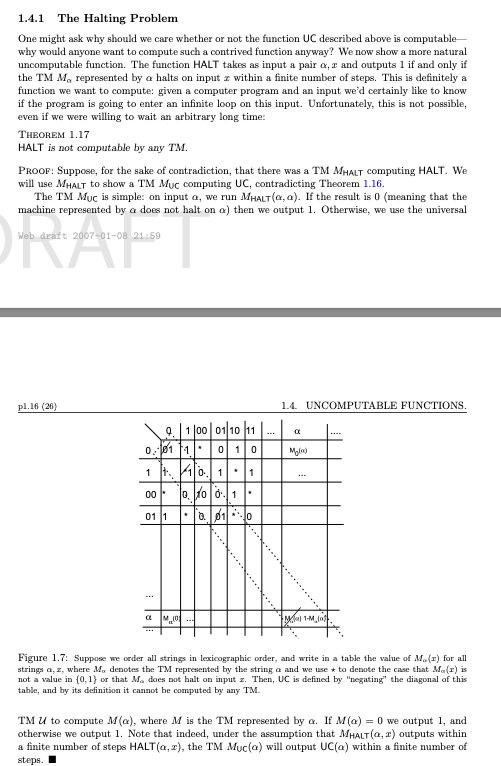

### 3-D version of cellular machine

### Life Rule:

In [277]:
life_rule = {
    (2, 3): (1, 1),
    (0, 1): (1, 0),
    (4, 8): (1, 0),
    (3, 3): (0, 1),
    (0, 2): (0, 0),
    (4, 8): (0, 0),
}

GoL is popular because:
+ There are simple initial conditions that yield surprisingly complex behavior.
+ There are many interesting stable patterns: some oscillate (with various periods) and some move like the spaceships in Wolfram’s Rule 110 CA.
+ Like Rule 110, GoL is Turing complete.

In [360]:
%matplotlib notebook

<IPython.core.display.Javascript object>


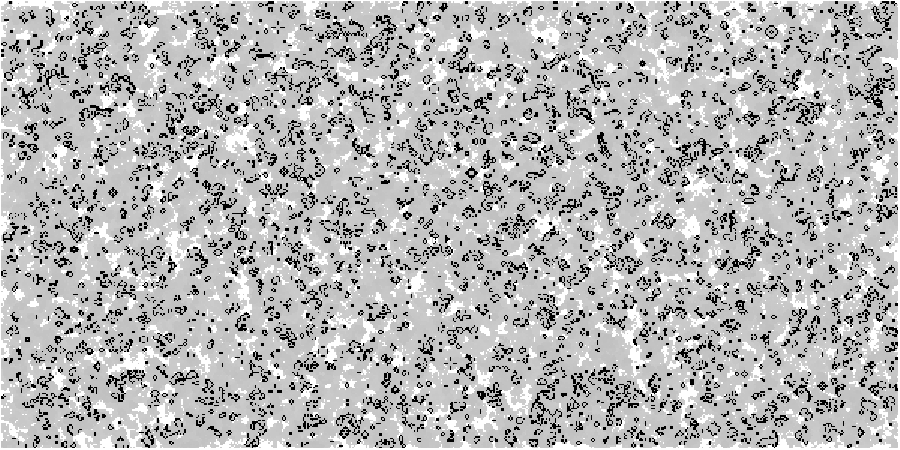

In [364]:

   
# -----------------------------------------------------------------------------
# From Numpy to Python
# Copyright (2017) Nicolas P. Rougier - BSD license
# More information at b
# -----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


def update(*args):
    global Z, M

    N = (Z[0:-2, 0:-2] + Z[0:-2, 1:-1] + Z[0:-2, 2:] +
         Z[1:-1, 0:-2]                 + Z[1:-1, 2:] +
         Z[2:  , 0:-2] + Z[2:  , 1:-1] + Z[2:  , 2:])
    birth = (N == 3) & (Z[1:-1, 1:-1] == 0)
    survive = ((N == 2) | (N == 3)) & (Z[1:-1, 1:-1] == 1)
    Z[...] = 0
    Z[1:-1, 1:-1][birth | survive] = 1

    # Show past activities
    M[M>0.25] = 0.25
    M *= 0.995
    M[Z==1] = 1
    # Direct activity
    # M[...] = Z
    im.set_data(M)


Z = np.random.randint(0, 2, (300, 600))
M = np.zeros(Z.shape)

size = np.array(Z.shape)
dpi = 80.0
figsize = size[1]/float(dpi), size[0]/float(dpi)
fig = plt.figure(figsize=figsize, dpi=dpi)
fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False)
im = plt.imshow(M, interpolation='nearest', cmap=plt.cm.gray_r, vmin=0, vmax=1)
plt.xticks([]), plt.yticks([])

animation = FuncAnimation(fig, update, interval=20, frames=2000)
#animation.save('game-of-life.mp4', fps=40, dpi=80, bitrate=-1, codec="libx264",
#                extra_args=['-pix_fmt', 'yuv420p'],
#                metadata={'artist':'Nicolas P. Rougier'})
plt.show()

## Computation Machine: A Precedure View

In [366]:
NOTING = lambda x: x

In [368]:
NOTING(10)

10

In [367]:
ZERO = lambda f: NOTING

In [410]:
def add_1(n):
    return lambda f: lambda x: f(n(f)(x))

In [411]:
ZERO.__code__.co_code

b't\x00S\x00'

In [412]:
ONE = add_1(ZERO)

In [478]:
def add(n1, n2):
    return lambda f: lambda x: n1(f)(n2(f)(x))

In [479]:
ONE.__code__.co_code

b'\x87\x00\x87\x01f\x02d\x01d\x02\x84\x08S\x00'

In [480]:
add(ZERO, ONE).__code__.co_code

b'\x87\x00\x87\x01\x87\x02f\x03d\x01d\x02\x84\x08S\x00'

In [481]:
ONE.__code__.co_code

b'\x87\x00\x87\x01f\x02d\x01d\x02\x84\x08S\x00'

In [473]:
TWO = add(ONE, ONE)

In [430]:
THREE = add(ONE, TWO)

In [468]:
THREE.__code__.co_code

b'\x87\x00f\x01d\x01d\x02\x84\x08S\x00'

In [469]:
add(ONE, add(ONE, ONE)).__code__.co_code

b'\x87\x00f\x01d\x01d\x02\x84\x08S\x00'

In [434]:
THREE.__code__.co_code == add(ONE, add(ONE, ONE)).__code__.co_code

True

In [435]:
FOUR = add(TWO, TWO)

In [436]:
FOUR.__code__.co_code

b'\x87\x00f\x01d\x01d\x02\x84\x08S\x00'

In [437]:
add(ONE, THREE).__code__.co_code

b'\x87\x00f\x01d\x01d\x02\x84\x08S\x00'

In [438]:
def build_list(x, y):
    return lambda m: m(x, y)

In [440]:
L = build_list(ONE, TWO)

In [443]:
def get_first(iters):
    return L(lambda p, q: p)

def get_last(iters):
    return L(lambda p, q: q)

In [451]:
ONE.__code__.co_code

b'\x87\x00\x87\x01f\x02d\x01d\x02\x84\x08S\x00'

In [452]:
get_first(L).__code__.co_code == ONE.__code__.co_code

True

In [453]:
longer = build_list(L, THREE)

In [458]:
get_first(longer) is ONE

True

In [457]:
get_first(longer).__code__.co_code == ONE.__code__.co_code

True

## From Finite State Machine to Operation Stack

In [470]:
import dis

In [471]:
dis.dis(generate_1_dimension_rule_by_number)

  2           0 LOAD_CONST               1 (2)
              2 STORE_FAST               1 (neighbor_num)

  3           4 BUILD_MAP                0
              6 STORE_FAST               2 (rule_map)

  4           8 LOAD_CONST               1 (2)
             10 LOAD_FAST                1 (neighbor_num)
             12 LOAD_CONST               2 (1)
             14 BINARY_ADD
             16 BINARY_POWER
             18 STORE_FAST               3 (rule_length)

  5          20 LOAD_GLOBAL              0 (bin)
             22 LOAD_FAST                0 (number)
             24 CALL_FUNCTION            1
             26 LOAD_CONST               1 (2)
             28 LOAD_CONST               0 (None)
             30 BUILD_SLICE              2
             32 BINARY_SUBSCR
             34 LOAD_METHOD              1 (zfill)
             36 LOAD_FAST                3 (rule_length)
             38 CALL_METHOD              1
             40 STORE_FAST               4 (binary_code)

  6    

## Intractable Problem
=> Decide whether a probelm could be solved in polynomial time with inputchange.

A turing machine M is said to be of *time* complexity T(n) if whenever M is given an input w of length n, M halts after making at most T(n) moves, regardless of whether or not M accepts. This difination applies to any function T(n), such as $T(n) = 50n^2$ or $T(n) = 3^n + n ^ 2 + n + 4$

## Review of Time Complexity 

$$ Notation \space of \space O() $$

$$ O(n^p), p \in N $$

A problem is assigned to the NP (nondeterministic polynomial time) class if it is solvable in polynomial time by a nondeterministic Turing machine.

A P-problem (whose solution time is bounded by a polynomial) is always also NP. If a problem is known to be NP, and a solution to the problem is somehow known, then demonstrating the correctness of the solution can always be reduced to a single P (polynomial time) verification. If P and NP are not equivalent, then the solution of NP-problems requires (in the worst case) an exhaustive search.

A problem is said to be NP-hard if an algorithm for solving it can be translated into one for solving any other NP-problem. It is much easier to show that a problem is NP than to show that it is NP-hard. A problem which is both NP and NP-hard is called an NP-complete problem.



$$ \therefore P \subset NP$$